# Day 14 : Underfitting and Overfitting
---

### Understanding Overfitting & Underfitting in Simple Terms

Imagine you're studying for an exam:<br>
Underfitting: You barely study and don’t learn enough, so you fail.<br>
Overfitting: You memorize the entire book, including unnecessary details, but struggle when faced with new questions.<br>
Good Model: You study the concepts, practice different types of problems, and perform well on any test.<br>
The same happens in machine learning models:<br>
Underfitting happens when the model is too simple and fails to capture important patterns.<br>
Overfitting happens when the model is too complex and memorizes the training data, failing on new data.<br>
#### 🔹 Why Does This Happen? <br>
Underfitting: Model lacks complexity, doesn’t learn enough from the data.<br>
Overfitting: Model is too complex, learns noise instead of patterns.<br>

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Target'] = data.target


In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.shape

(20640, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target']), df['Target'], test_size=0.2, random_state=42)

In [8]:
#Standardized Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#Train different models
lin_reg= LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

In [10]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [11]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [12]:
#Overfitting model
dt = DecisionTreeRegressor(max_depth=None)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [13]:
#Compute errors
errors = {
    'Linear Regression': mean_squared_error(y_test, y_pred_lin),
    'Ridge Regression': mean_squared_error(y_test, y_pred_ridge),
    'Lasso Regression': mean_squared_error(y_test, y_pred_lasso),
    'Decision Tree (Overfitting)': mean_squared_error(y_test, y_pred_dt),
}

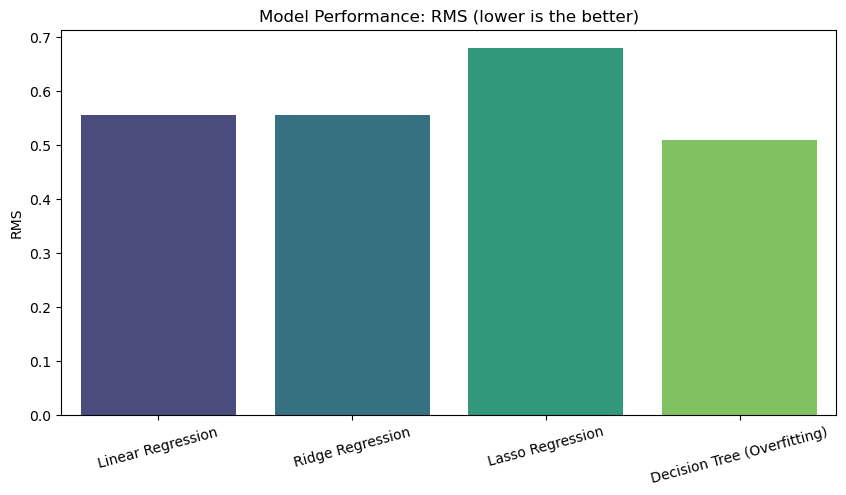

In [14]:
#Visualization
plt.figure(figsize=(10,5))
sns.barplot(x=list(errors.keys()), y=list(errors.values()),hue=list(errors.keys()), palette='viridis', legend=False)
plt.title("Model Performance: RMS (lower is the better)")
plt.xticks(rotation=15)
plt.ylabel("RMS")
plt.show()